In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import os
import cv2
import matplotlib.patches as patches
from utils.parse_xml import xmlParser
import torch
import itertools

In [3]:
# final variables
COLOR_CYC = ['b','g','r','c','m','y']
TARGET_SIZE = (256, 256)

LABEL_ORDERS_DEFAULT = {'Circle fit to humeral articular surface':0,
 'Spinoglenoid notch':1,
 'Anterior lip of glenoid fossa':2,
 'Posterior lip of glenoid fossa':3,
 'Center of glenoid fossa':4,
 'Scapular body point':5}

LABEL_ORDERS_DEFAULT_LST = ['Circle fit to humeral articular surface',
 'Spinoglenoid notch',
 'Anterior lip of glenoid fossa',
 'Posterior lip of glenoid fossa',
 'Center of glenoid fossa',
 'Scapular body point'] 


This notebook introduces two ways to import annotations.

*actually, attempt to use datumaro for imports failed

In [4]:
# 1. using custom class to parse the xml file

xml_path = "out_sample/annotations.xml"


In [5]:
%%capture

data = xmlParser(xml_path);

In [6]:
annotations = data.get_annotations()

In [7]:
# what's in annotations?
next(iter(annotations.items()))

('829.postopAxillary.jpg',
 {'ellipse': [{'label': 'Spinoglenoid notch',
    'source': 'manual',
    'occluded': '0',
    'cx': '127.20',
    'cy': '2388.26',
    'rx': '20.09',
    'ry': '23.44',
    'z_order': '0'},
   {'label': 'Circle fit to humeral articular surface',
    'source': 'manual',
    'occluded': '0',
    'cx': '572.60',
    'cy': '2232.52',
    'rx': '279.65',
    'ry': '303.08',
    'z_order': '0'}],
  'keypoints': [{'label': 'Anterior lip of glenoid fossa',
    'source': 'manual',
    'occluded': '0',
    'points': '310.28,2042.92',
    'z_order': '0'},
   {'label': 'Posterior lip of glenoid fossa',
    'source': 'manual',
    'occluded': '0',
    'points': '233.89,2251.25',
    'z_order': '0'},
   {'label': 'Center of glenoid fossa',
    'source': 'manual',
    'occluded': '0',
    'points': '261.67,2147.08',
    'z_order': '0'},
   {'label': 'Scapular body point',
    'source': 'manual',
    'occluded': '0',
    'points': '88.06,2188.75',
    'z_order': '0'}]})

In [8]:
image_folder = "data/all_images/"
sample_image_name = "859.preopAxillary.jpg"
sample_image = os.path.join(image_folder, sample_image_name)

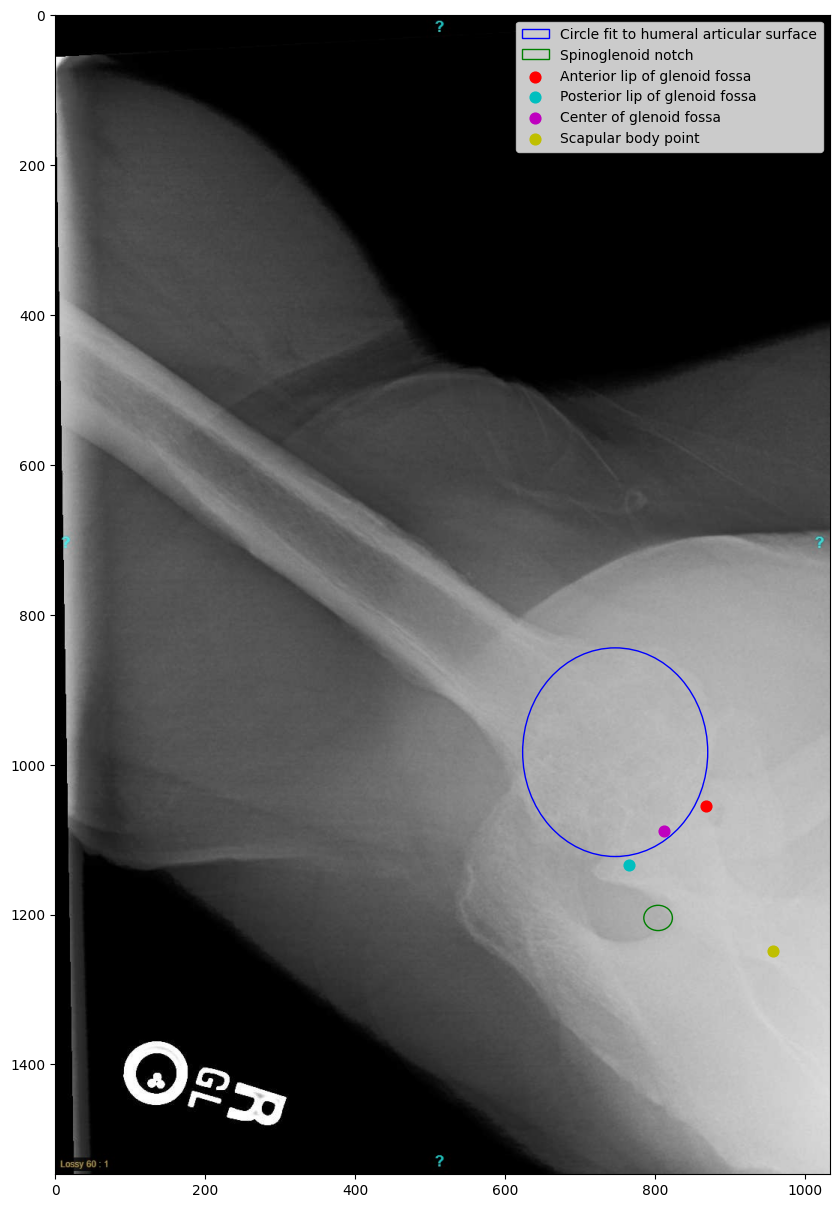

In [9]:
# reconstructing annotated images: example

def draw_unresized_image(sample_image):

    plt.figure(figsize=(10,20))
    plt.imshow(cv2.imread(sample_image))


    # plt draw an ellipse on this image

    for ellipse in annotations[sample_image_name]['ellipse']:
        c = COLOR_CYC[LABEL_ORDERS_DEFAULT[ellipse["label"]]]
        plt.gca().add_patch(
            patches.Ellipse(xy=(float(ellipse["cx"]),float( ellipse["cy"]) ), width=2*float(ellipse["rx"]), height=2*float(ellipse["ry"]),fill=False,color=c,label = ellipse["label"])
        )

    for keypoints in annotations[sample_image_name]['keypoints']:
        c = COLOR_CYC[LABEL_ORDERS_DEFAULT[keypoints["label"]]]
        x, y = map(float, keypoints["points"].split(","))
        plt.scatter(x,y,color=c,label = keypoints["label"], s=60)
    plt.legend();

draw_unresized_image(sample_image)

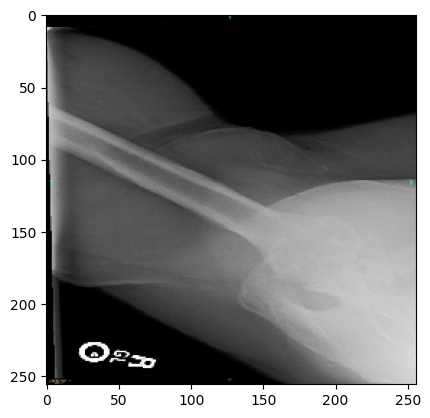

In [73]:
# resize this image
target_size = (256, 256)
img = cv2.imread(sample_image)
plt.imshow(cv2.resize(img, (256, 256)))

In [74]:
# note: cv2 image shape as (y, x)

def resize_point(img, point, target_size=(256, 256)):
    # point: tuple of (x, y)
    # img needs to be an image object

    y, x = img.shape[:2]
    scale_x = target_size[1] / x
    scale_y = target_size[0] / y

    return point[0]*scale_x, point[1]*scale_y

def resize_ellipse(img, ellipse, target_size=(256, 256)):
    # ellipse: quadruple (cx, cy, rx, ry)
    # img needs to be an image object

    y, x = img.shape[:2]

    scale_x = target_size[1] / x
    scale_y = target_size[0] / y

    return ellipse[0]*scale_x, ellipse[1]*scale_y, ellipse[2]*scale_x, ellipse[3]*scale_y


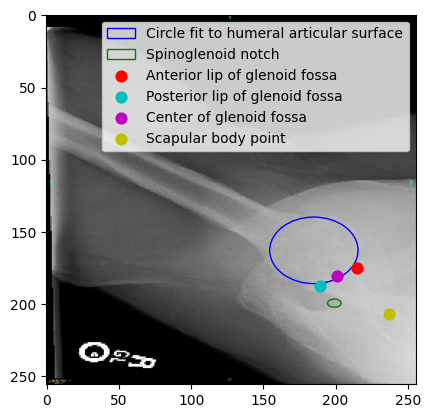

In [75]:

# resize this image
target_size = (256, 256)
img = cv2.imread(sample_image)
plt.imshow(cv2.resize(img, (256, 256)))

# plt draw an ellipse on this image

for ellipse in annotations[sample_image_name]['ellipse']:
    ell = tuple(map(float, (ellipse["cx"], ellipse["cy"], ellipse["rx"], ellipse["ry"])))
    cx, cy, rx, ry = resize_ellipse(img, ell, target_size)
    dx, dy = rx * 2, ry * 2
    c = COLOR_CYC[LABEL_ORDERS_DEFAULT[ellipse["label"]]]
    
    plt.gca().add_patch(
        patches.Ellipse(xy=(cx, cy ), width=dx, height=dy,fill=False,color=c,label = ellipse["label"])
    )

for keypoints in annotations[sample_image_name]['keypoints']:
    c = COLOR_CYC[LABEL_ORDERS_DEFAULT[keypoints["label"]]]

    x, y = map(float, keypoints["points"].split(","))

    x, y = resize_point( img, (x, y), target_size)
    plt.scatter(x,y,color=c,label = keypoints["label"], s=60)
plt.legend();

In [10]:
# please verify the resize works on samples
annotations

{'829.postopAxillary.jpg': {'ellipse': [{'label': 'Spinoglenoid notch',
    'source': 'manual',
    'occluded': '0',
    'cx': '127.20',
    'cy': '2388.26',
    'rx': '20.09',
    'ry': '23.44',
    'z_order': '0'},
   {'label': 'Circle fit to humeral articular surface',
    'source': 'manual',
    'occluded': '0',
    'cx': '572.60',
    'cy': '2232.52',
    'rx': '279.65',
    'ry': '303.08',
    'z_order': '0'}],
  'keypoints': [{'label': 'Anterior lip of glenoid fossa',
    'source': 'manual',
    'occluded': '0',
    'points': '310.28,2042.92',
    'z_order': '0'},
   {'label': 'Posterior lip of glenoid fossa',
    'source': 'manual',
    'occluded': '0',
    'points': '233.89,2251.25',
    'z_order': '0'},
   {'label': 'Center of glenoid fossa',
    'source': 'manual',
    'occluded': '0',
    'points': '261.67,2147.08',
    'z_order': '0'},
   {'label': 'Scapular body point',
    'source': 'manual',
    'occluded': '0',
    'points': '88.06,2188.75',
    'z_order': '0'}]},
 '82

In [79]:
# export annotations as tensors
import cv2
from tqdm.notebook import tqdm

print("Size of dataset:", len(annotations))

def annotation_to_tensor(data: xmlParser, annotations: dict, target_size: tuple, num_ell=2, num_pts=4) -> None:

    # image in pytorch:  [N, C, H, W] 
    X = torch.zeros(len(annotations), 3, target_size[1], target_size[0])
    
    _k = next(iter(annotations))
    yyshape = num_ell * 4 + num_pts * 2
    target = torch.zeros(len(annotations), yyshape)

    # y columns in the order 
    # (cx_1, cy_1, rx_1, ry_1,...,cx_n, cy_n, rx_n, ry_n , x_1, y_1,..., x_n, y_n)

    img_names =  data.get_image_names()    
    for idx, sample_image_name in tqdm(enumerate(img_names)):
        sample_image = os.path.join(image_folder, sample_image_name)
        img = cv2.imread(sample_image)
        resized_img = cv2.resize(img, target_size)
        X[idx, :, :, :] = torch.from_numpy(resized_img).permute(2, 1, 0)
        ys = [float("inf") for _ in range(yyshape)]
        for ellipse in annotations[sample_image_name]['ellipse']:
            ell = tuple(map(float, (ellipse["cx"], ellipse["cy"], ellipse["rx"], ellipse["ry"])))
            cx, cy, rx, ry = resize_ellipse(img, ell, target_size)
            
            start = LABEL_ORDERS_DEFAULT[ellipse["label"]]*4
            end = start + 4

            ys[start:end] = [cx, cy, rx, ry]



        for keypoints in annotations[sample_image_name]['keypoints']:
            x, y = map(float, keypoints["points"].split(","))

            x, y = resize_point( img, (x, y), target_size)

            start = num_ell*4 + (LABEL_ORDERS_DEFAULT[keypoints["label"]]-num_ell)*2
            end = start + 2

            ys[start:end] = [x,y]
        try:
            assert len(ys) == yyshape
        except:
            print("**********")
            print(f"Bad annotation on {sample_image_name}")
            if len(ys)<yyshape:
                # pad ys to length yyshape
                ys.extend([0]*(yyshape-len(ys)))
                print("Missing points")
            else:
                # truncate ys to length yyshape
                ys = ys[:yyshape]
                print("Too many points")
            print("**********")
            
            

        target[idx, :] = torch.Tensor(ys)
    return X, target


Size of dataset: 75


In [80]:
X, y = annotation_to_tensor(data, annotations, target_size)

0it [00:00, ?it/s]

In [81]:
def draw_pred(X, y, idx, num_ell=2, num_pts=4) -> None:
    # draw an X, y pair
    colors = iter(COLOR_CYC)
    labels = iter(LABEL_ORDERS_DEFAULT_LST)

    ellipses = y[idx, :][:4*num_ell]
    points = y[idx, :][4*num_ell:]
    # torch auto casts data to floating point numbers
    # to make the behavior of plt.imshow consistent
    # recast the image to int type
    plt.imshow(X[idx, :, :, :].permute(2, 1, 0).int())
    for i in range(num_ell):

        ell = ellipses[4*i:4*(i+1)]
        cx, cy, rx, ry = ell
        dx, dy = rx * 2, ry * 2
        plt.gca().add_patch(
            patches.Ellipse(xy=(cx, cy ), width=dx, height=dy,fill=False,color=next(colors),label = next(labels))
        )
    
    for k in range(num_pts):
        x, y = points[2*k:2*(k+1)]

        plt.scatter(x,y,color=next(colors),label = next(labels), s=60)
    plt.legend();
    

In [82]:
idx =0

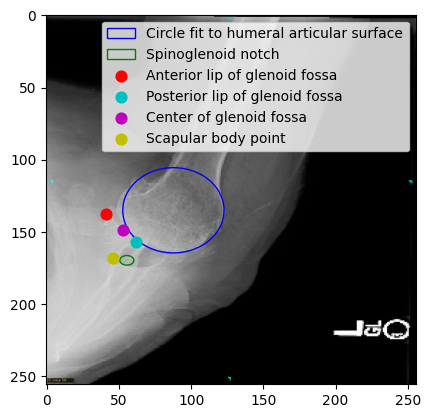

In [84]:
# try different samples and see how they look
draw_pred(X, y, idx)
idx+=1

In [85]:
# finally save X, y as tensor files

try:
    torch.save(X, 'X.pt')
    torch.save(y, 'y.pt')
except:
    print('Error saving files')

In [86]:
# X = torch.load("X.pt")
# y = torch.load("y.pt")

# X_1 = torch.load("x_try.pt")
# y_1 = torch.load("y_try.pt")

In [90]:
# sum(X != X_1).sum()
# sum(y != y_1).sum()


tensor(0)